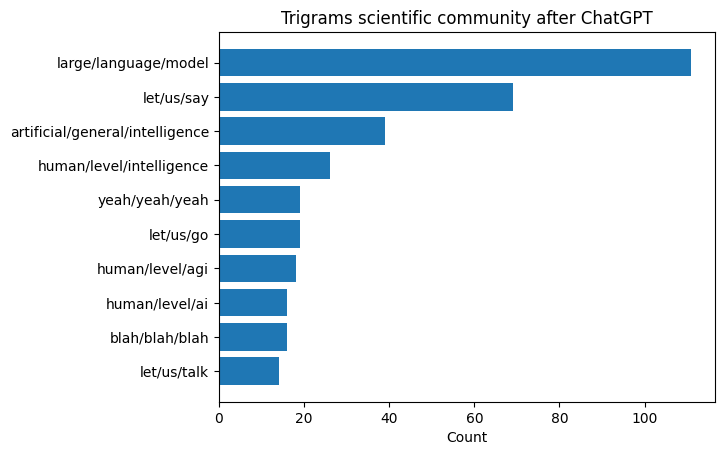

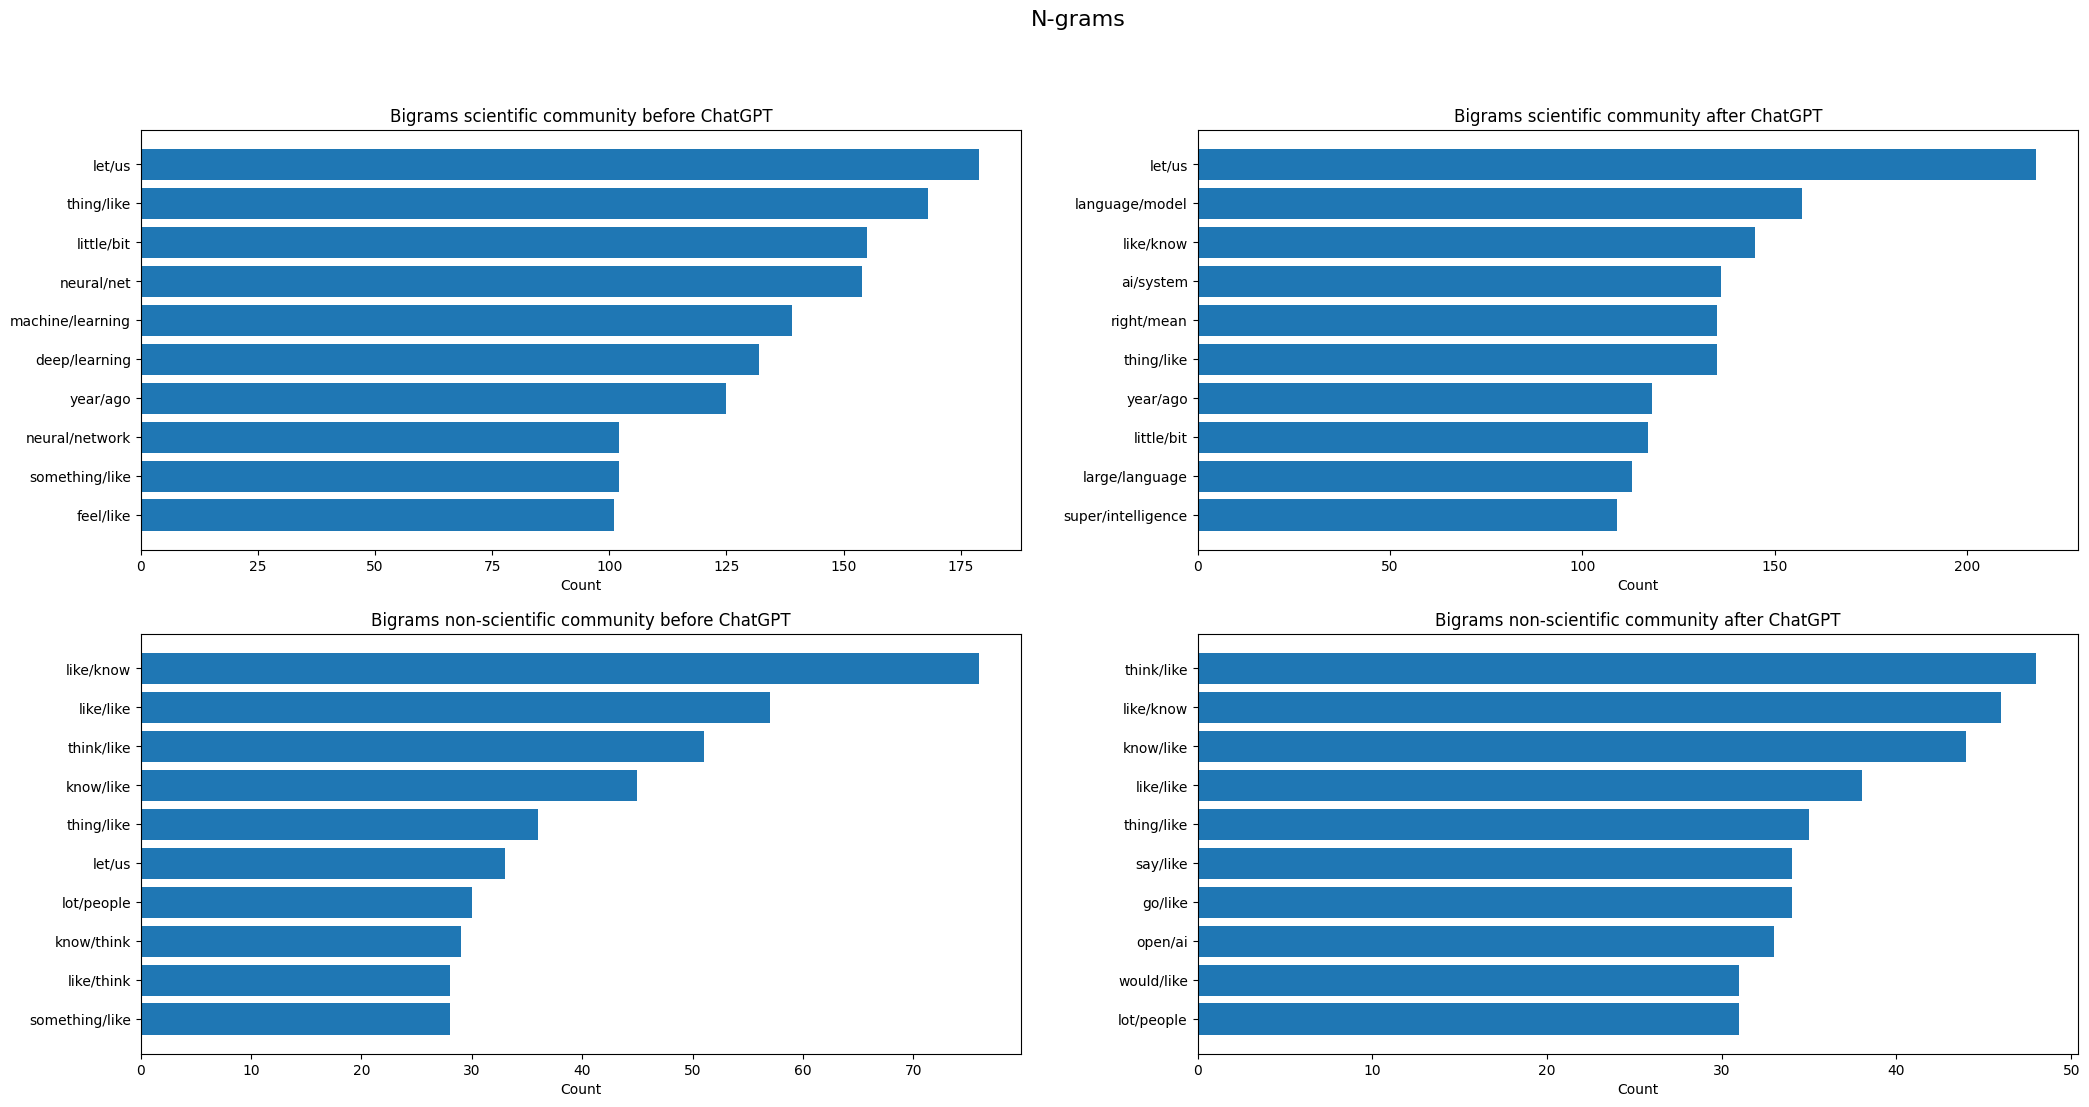

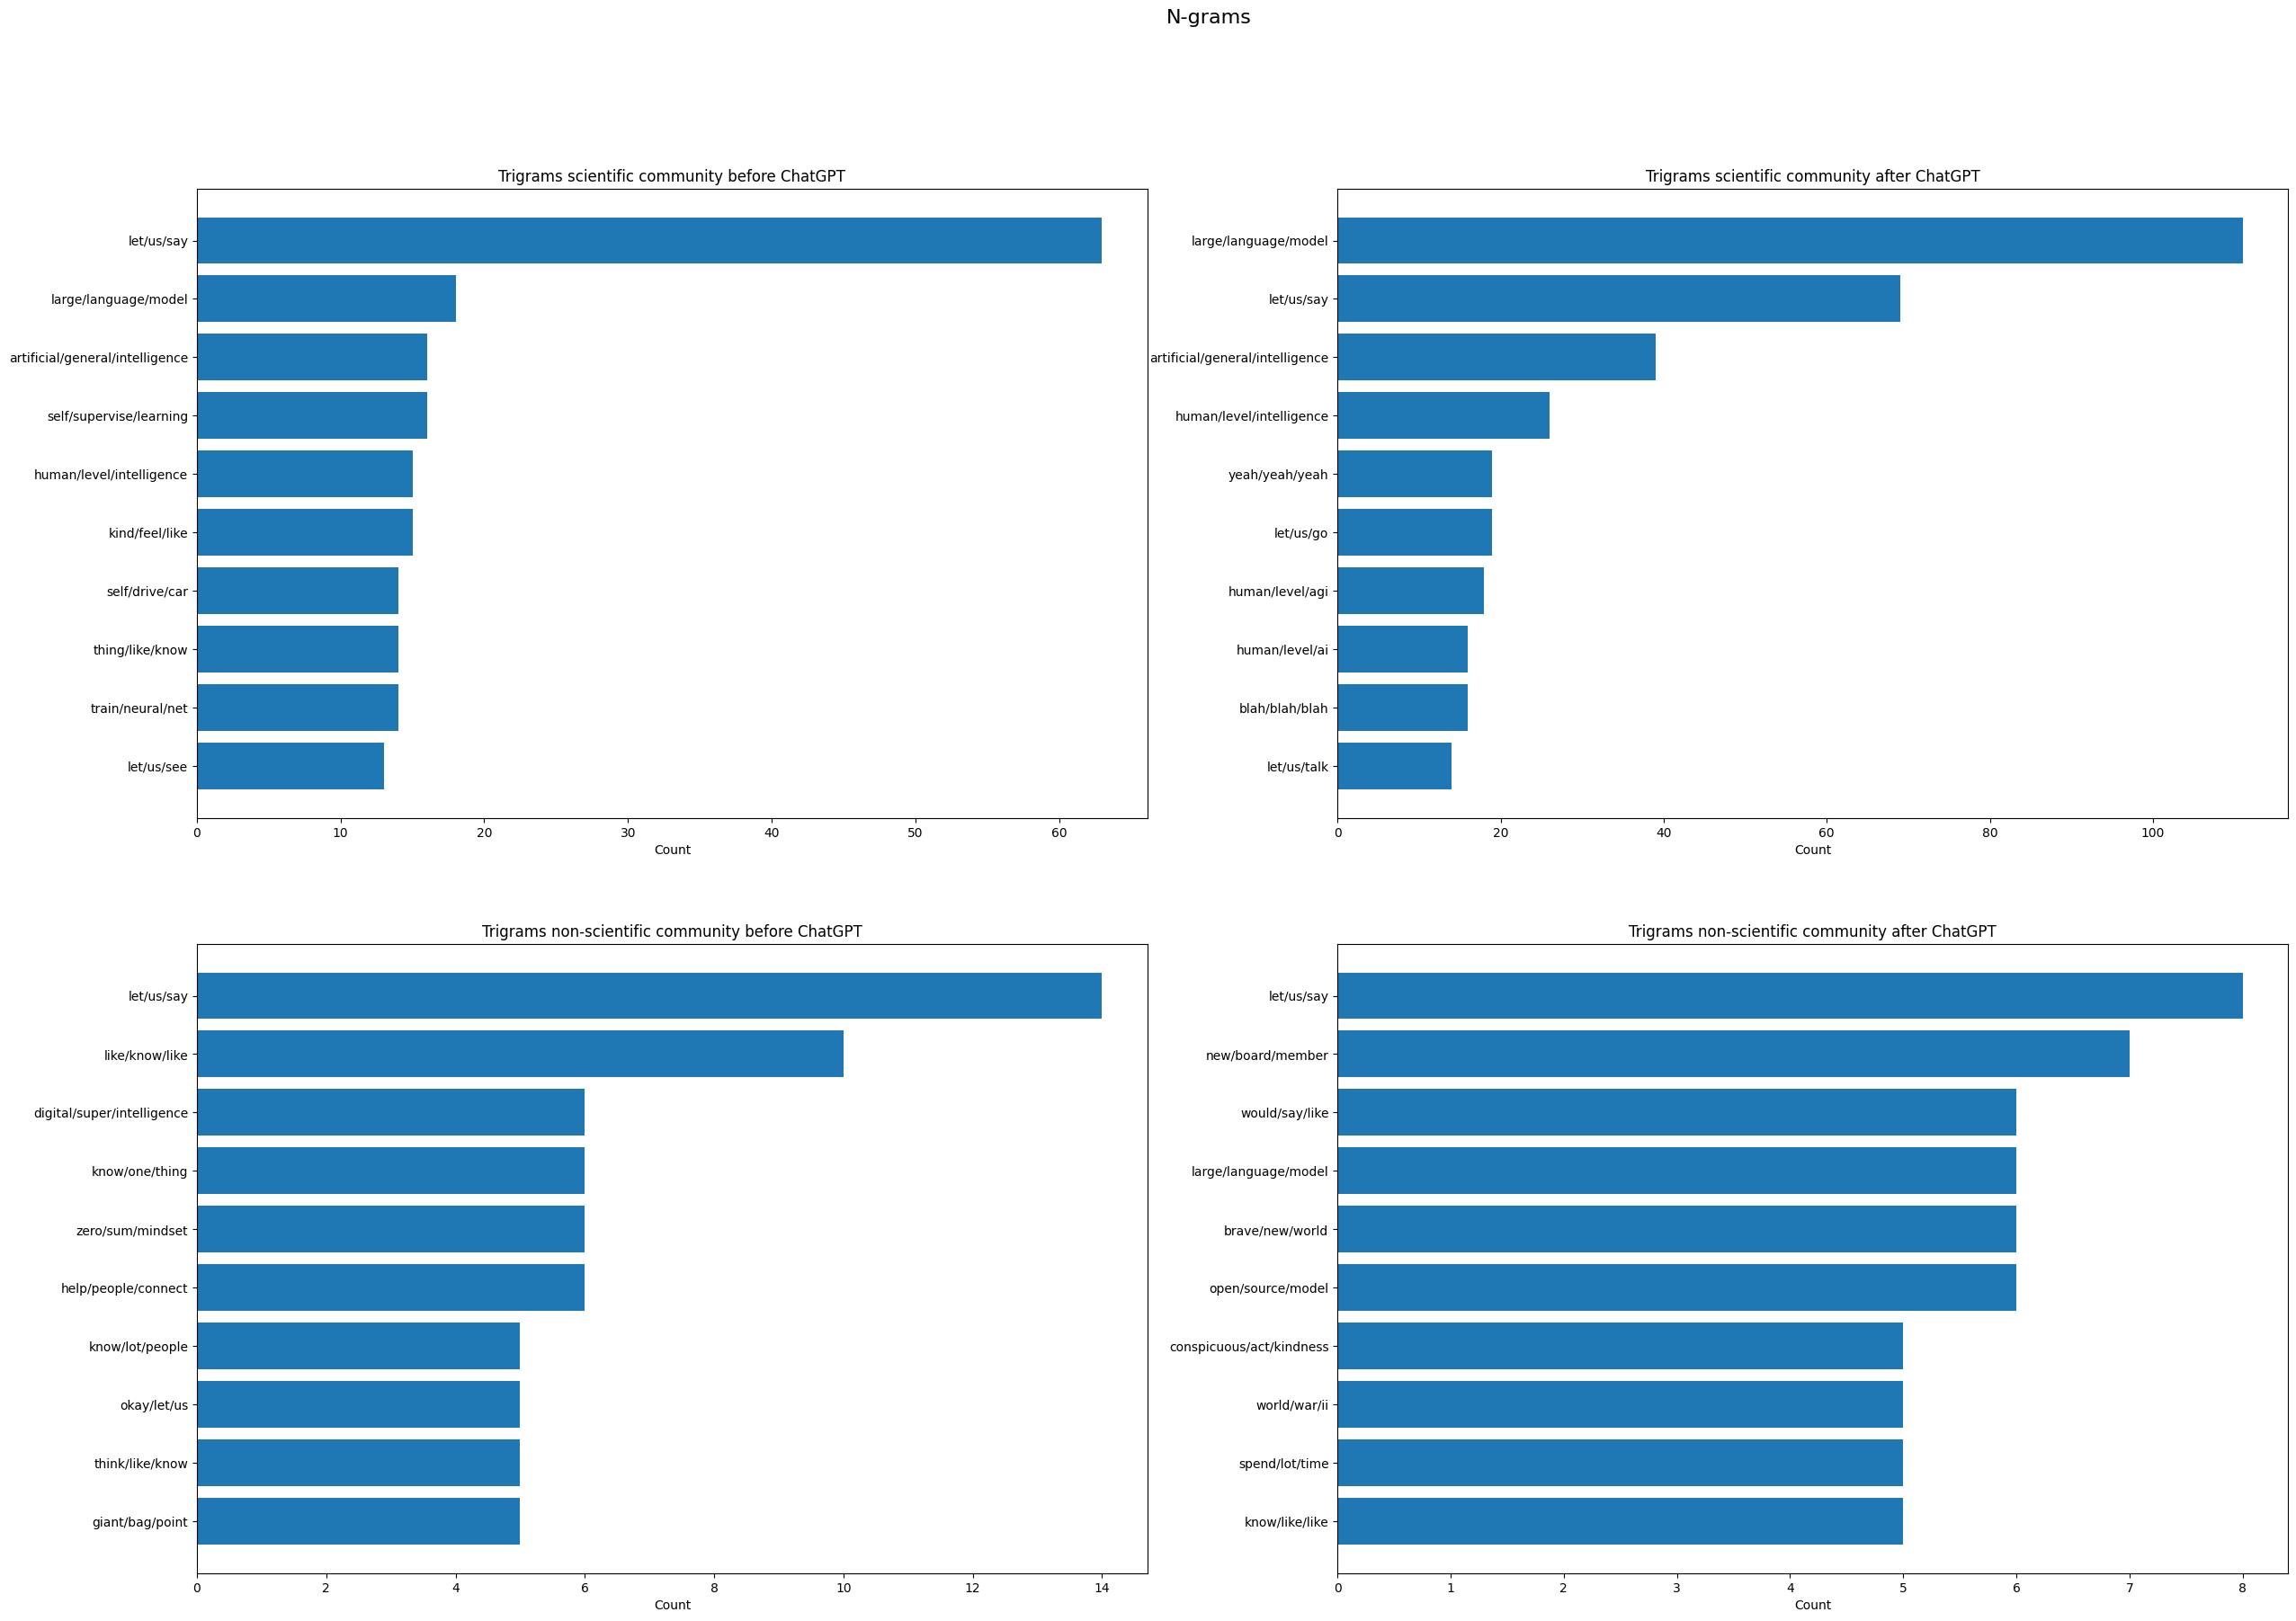

In [57]:
import nltk
from nltk import bigrams
from nltk import trigrams
import matplotlib.pyplot as plt
from utils import read_transcripts_lines
from typing import *
from dataclasses import dataclass
import numpy as np

import matplotlib.pyplot as plt
import os

@dataclass
class NgramData:
    ngrams: List[str]
    counts: List[int]
    title: str

def plot_ngrams(data: Tuple[List[str], List[int]], title: str):
    fig, ax = plt.subplots()

    (keys, values) = data
    y_pos = np.arange(len(keys))
    ax.barh(y_pos, values, align='center')
    ax.set_yticks(y_pos, labels=keys)
    ax.invert_yaxis() 
    ax.set_xlabel('Count')
    ax.set_title(title)

    plt.show()

def plot_ngram_on_ax(data: NgramData, ax: plt.Axes):
    y_pos = np.arange(len(data.ngrams))
    ax.barh(y_pos, data.counts, align='center')
    ax.set_yticks(y_pos, labels=data.ngrams)
    ax.invert_yaxis()
    ax.set_xlabel('Count')
    ax.set_title(data.title)
    
def plot_many_ngrams(data: List[NgramData], filename: str, figsize: Tuple[int, int]):
    nr_rows = int(len(data) / 2)
    fig, axes = plt.subplots(nrows=nr_rows, ncols=2, figsize=figsize)
    fig.suptitle('N-grams', fontsize=16)

    row = 0
    for first, second in zip(*(iter(data),) * 2):
        plot_ngram_on_ax(first, axes[row, 0] if nr_rows > 1 else axes[0])
        plot_ngram_on_ax(second, axes[row, 1] if nr_rows > 1 else axes[1])
        row += 1

    plt.show()
    fig.savefig(filename)

def get_bigrams(transcript: str, take: int = 10) -> Tuple[List[str], List[int]]:
    return get_ngrams(transcript, bigrams, take)

def get_bigram_data(transcript: str, title: str, take: int = 10) -> NgramData:
    (ngrams, counts) = get_bigrams(transcript, take)
    return NgramData(ngrams, counts, title)

def get_trigrams(transcript: str, take: int = 10) -> Tuple[List[str], List[int]]:
    return get_ngrams(transcript, trigrams, take)

def get_trigram_data(transcript: str, title: str, take: int = 10) -> NgramData:
    (ngrams, counts) = get_trigrams(transcript, take)
    return NgramData(ngrams, counts, title)

def get_ngrams(transcript: str, fn, take: int = 10) -> Tuple[List[str], List[int]]:
    tokens = list(read_transcripts_lines(transcript))
    distribution = nltk.FreqDist(fn(tokens))
    keys = []
    values = []

    for k,v in sorted(distribution.items(), key=lambda x:int(x[1]), reverse=True)[:take]:
        keys.append("/".join(list(k)))
        values.append(v)

    return (keys, values)

# plot_ngrams(get_bigrams("scientific-before/transcripts-cleaned.txt"), "Bigrams scientific community before ChatGPT")
# plot_ngrams(get_bigrams("scientific-after/transcripts-cleaned.txt"), "Bigrams scientific community after ChatGPT")
# plot_ngrams(get_trigrams("scientific-before/transcripts-cleaned.txt"), "Trigrams scientific community before ChatGPT")
# plot_ngrams(get_trigrams("scientific-after/transcripts-cleaned.txt"), "Trigrams scientific community after ChatGPT")
plot_many_ngrams(
    [
       get_bigram_data("scientific-before/transcripts-cleaned.txt", "Bigrams scientific community before ChatGPT", take = 10),
       get_bigram_data("scientific-after/transcripts-cleaned.txt", "Bigrams scientific community after ChatGPT", take = 10),
       get_bigram_data("non-scientific-before/transcripts-cleaned.txt", "Bigrams non-scientific community before ChatGPT", take = 10),
       get_bigram_data("non-scientific-after/transcripts-cleaned.txt", "Bigrams non-scientific community after ChatGPT", take = 10),
    ],
    "./figures/bigrams.png",
    (25, 12)
)
plot_many_ngrams(
    [
       get_trigram_data("scientific-before/transcripts-cleaned.txt", "Trigrams scientific community before ChatGPT", take = 10),
       get_trigram_data("scientific-after/transcripts-cleaned.txt", "Trigrams scientific community after ChatGPT", take = 10),
       get_trigram_data("non-scientific-before/transcripts-cleaned.txt", "Trigrams non-scientific community before ChatGPT", take = 10),
       get_trigram_data("non-scientific-after/transcripts-cleaned.txt", "Trigrams non-scientific community after ChatGPT", take = 10),
    ],
    "./figures/trigrams.png",
    (30, 20)
)

